### Especificação

O objetivo deste projeto é construir um classificador de Spam usando o algoritmo de classificação Naive Bayes. 

O modelo de documento que usaremos aqui é um modelo de saco de palavras(bag of words). Usaremos o modelo bag of words:

- Com base na frequência de palavras (frequência de ocorrência de palavra no documento, o que tornará os atributos de entrada contínuos)

### Modelo Bag of Words

Um saco de palavras (bag of words) é uma representação de um texto como um agrupamento de palavras, sem qualquer consideração da sua estrutura gramatical ou da ordem das palavras. É simplesmente um histograma sobre as palavras da língua, e cada documento é representado como um vetor sobre estas palavras. As entradas neste vetor simplesmente correspondem à presença ou à ausência da palavra correspondente.

A seguir criaremos uma função para ler o conjunto de dados, verificar a frequência de palavras e então ajustar o modelo.

In [18]:
#Importando as bibliotecas
import os
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, precision_score

In [19]:
sns.set()
warnings.filterwarnings('ignore')

In [20]:
#Bag of Words from scratch
documents = ['Hello, how are you!',
             'Win money, win from home.',
             'Call me now.',
             'Hello, Call hello you tomorrow?']

In [21]:
count_vector = CountVectorizer() #set the variable

count_vector.fit(documents) #fit the function
count_vector.get_feature_names() #get the outputs
doc_array = count_vector.transform(documents).toarray()
doc_array
frequency_matrix = pd.DataFrame(doc_array,
                                columns = count_vector.get_feature_names()
                               )
frequency_matrix


,are,call,from,hello,home,how,me,money,now,tomorrow,win,you
0,1,0,0,1,0,1,0,0,0,0,0,1
1,0,0,1,0,1,0,0,1,0,0,2,0
2,0,1,0,0,0,0,1,0,1,0,0,0
3,0,1,0,2,0,0,0,0,0,1,0,1


In [36]:
frequency_matrix.histogram()

AttributeError: 'DataFrame' object has no attribute 'histogram'

### PART 1: DATA PREPROCESSING

Since the dataset comes with additional unnamed, column, I need to drop them first.

#### Isto irá construir um modelo de contagem de palavras, que irá contar a ocorrência de palavra dentro de documentos  e construir as contagens de classe a partir dos dados de treinamento

Modelo
1.    neste modelo, o número de vezes que a palavra ocorre no doc (frequência) é contabilizado.


#### Preparando o conjunto de dados

Diretório onde se encontra o conjunto de treino

In [22]:
files_path='Dados\\train' # Local onde se encontram os dados

Agora temos que ler todos os e mails e armazená-los em uma lista, classificando-os em spam ou notspam.

In [23]:
traintest=[]
documents=[]
my_label=[]

# Isto irá construir um modelo de contagem de palavras, que irá contar a ocorrência de palavra dentro de documentos 
# e construir as contagens de classe a partir dos dados de treinamento

# Serão dois tipos de modelos
# 1) Binário - apenas indicando presença ou ausência de palavras em doc.
# 2) Contínuo -neste modelo, o número de vezes que a palavra ocorre no doc (frequência) é contabilizado.


print ("Primeiro contamos as palavras no dataset de treino. Estou processando. Seja paciente e aguarde...")
dirs = os.listdir(files_path)
for class_dir_name in dirs:
    for f in os.listdir(os.path.join(files_path, class_dir_name)):
        document = os.path.join(files_path, class_dir_name, f)
        with open(document, 'r', encoding = "latin1") as file:
            words = file.read()
#             .split()
            documents.append(words)
            my_label.append(class_dir_name)
            traintest.append('train')

Primeiro contamos as palavras no dataset de treino. Estou processando. Seja paciente e aguarde...


In [24]:
files_path='Dados\\test' # Local onde se encontram os dados
# Isto irá construir um modelo de contagem de palavras, que irá contar a ocorrência de palavra dentro de documentos 
# e construir as contagens de classe a partir dos dados de treinamento

# Serão dois tipos de modelos
# 1) Binário - apenas indicando presença ou ausência de palavras em doc.
# 2) Contínuo -neste modelo, o número de vezes que a palavra ocorre no doc (frequência) é contabilizado.


print ("Contando as palavras no dataset de teste. Estou processando. Seja paciente e aguarde...")
dirs = os.listdir(files_path)
for class_dir_name in dirs:
    for f in os.listdir(os.path.join(files_path, class_dir_name)):
        document = os.path.join(files_path, class_dir_name, f)
        with open(document, 'r', encoding = "latin1") as file:
            words = file.read()
#             .split()
            documents.append(words)
            my_label.append(class_dir_name)
            traintest.append('test')

Contando as palavras no dataset de teste. Estou processando. Seja paciente e aguarde...


A seguir será criado um dataframe contendo a classificação na primera colulna e o e-mail na segunda. Iremos também substituir as strings notspam e spam por 0 e 1 respectivamente

In [25]:
Dict = {'Dividir':traintest,'labels': my_label, 'mensagem': documents} 

In [26]:
df=pd.DataFrame(Dict)
df['labels'] = df.labels.map({'notspam':0, 'spam':1})

Preparando os dados com a função CountVectorizer

In [27]:
count_vector = CountVectorizer() #set the variable
dataset_transformado = count_vector.fit_transform(documents)

Dividindo o Dataframe em trinamento e teste

In [28]:
# indices do datassest de traino e de teste
slice_indices=np.arange(df.shape[0])
slice_train=slice_indices[df.Dividir=='train']
slice_test=slice_indices[df.Dividir=='test']

In [29]:
X_train=dataset_transformado[slice_train,:]
X_test=dataset_transformado[slice_test,:]

In [30]:
y_train=df.labels[df.Dividir=='train']
y_test=df.labels[df.Dividir=='test']

#### Ajustando o modelo

In [31]:
naive_bayes = MultinomialNB() #call the method
naive_bayes.fit(X_train, y_train) #train the classifier on the training set

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [32]:
predictions = naive_bayes.predict(X_train) #predic using the model on the testing set

In [33]:
print('accuracy score: {}'.format(accuracy_score(y_train,predictions)))
print('precision score: {}'.format(precision_score(y_train,predictions)))

accuracy score: 0.9875283446712018
precision score: 0.9983122362869198


### Avaliando o modelo

Com o modelo ajustado, é necessário testar sua capacidade de predizer valores de mensagens que ele ainda não tenha visto. Assim, ireos carregar o arquivo de teste e utilizar o modelo ajustado para predizer os valores dos e-mails. E então comparar com seu real valor.

#### Predizendo os valores dos dados de teste.

In [34]:
predictions = naive_bayes.predict(X_test) #predic using the model on the testing set
print('accuracy score: {}'.format(accuracy_score(y_test,predictions)))
print('precision score: {}'.format(precision_score(y_test,predictions)))

accuracy score: 0.9733750978856696
precision score: 0.9877729257641922


Text(0.5, 12.5, 'Predicted label')

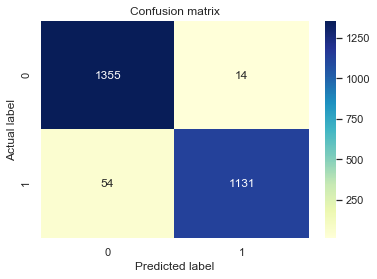

In [35]:
#confusion_matrix
cnf_matrix = confusion_matrix(y_test,predictions)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')